# Event-based Visual Microphone

### Purpose
This notebook allows to recover sound from an event video of an object vibrating due to sound. The conversion involves transofrming an RGB video to an event video, which is followed by converting an event video to sound. An RGB video needs to be first converted, as when this project was carried an event camera wasn't available.

### Objectives
- To break a video into segments..
- To convert RGB video to an event video using a v2e toolbox inspired.
- To convert event video to sound using a steerable pyramid by Davis et al.
- To use a bandwidth extension model to enhance the recovered sound.
- To visualise the recovered signal.

### Dependencies
To run this notebook, you will need the following libraries:
- `cv2`: OpenCV
- `numpy` : NumPy
- `scipy` : SciPy
- `torch` : PyTorch
- `librosa` : Librosa
- `tensorflow` : TensorFlow
- `matplotlib` : Matplotlib
- `soundfile` : Soundfile
- `sounddevice` : Sounddevice

In [1]:
import utilities.video_frames as frames
import event_camera.simulator_utils as camera
import steerable_pyramid.davis_method as pyramid

## Break RGB video into segments
The code bellow assess the video size and breaks it into 2GB segments. The videos are stored in a tempory folder in Documents, which is then deleted automatically at the end.

<span style="color:red"> Enter the input video file path and fps bellow: </span>

In [2]:
framerate = 2200
video_path = '/Volumes/Omkar 5T/video_dataset/plants.avi'

In [3]:
frames.extract_video_segments(video_path)

Temporary folder created: /Users/omkarpatil/Documents/TemporaryVideoSegments
Saved video segment 1/16 to Documents.
Saved video segment 2/16 to Documents.
Saved video segment 3/16 to Documents.
Saved video segment 4/16 to Documents.
Saved video segment 5/16 to Documents.
Saved video segment 6/16 to Documents.
Saved video segment 7/16 to Documents.
Saved video segment 8/16 to Documents.
Saved video segment 9/16 to Documents.
Saved video segment 10/16 to Documents.
Saved video segment 11/16 to Documents.
Saved video segment 12/16 to Documents.
Saved video segment 13/16 to Documents.
Saved video segment 14/16 to Documents.
Saved video segment 15/16 to Documents.
Saved video segment 16/16 to Documents.


## Convert RGB video to event video
This process uses a v2e toolbox inspired model created by Tobi Delbruck, Yuhuang Hu and Zhe He. The only difference is that our model doesn't include event noise. There are two important variables:
- **Cut-off frequency** (`cutoff_freq`): for event pixel bandwidth: more information can be extracted at lower frequerncies. This makes it perfect for low light conditions.
- **+/-ve thresholds** (`pos_thresh` and `neg_thresh`) : completely based on the cut-off frequency and the maximum allowable events for any pixel.

### Ideal paramters for Visual Microphone dataset
For the slow-motion RGB video datastet from Abe Davis' Visual Microphone dataset, the ideal parameters are:
- MIDI Chips Bag: `3e-4` cutoff-freq, `8e-7` pos_thresh and `8e-7` neg_thresh
- MIDI Plants:
- Speech Chips Bag 2.2kHz:
- Speech Chips Bag 20kHz:

<span style="color:red"> Enter the simulation parameters bellow: </span>

In [4]:
cutoff_freq = 3e-4
pos_thresh = 8e-7
neg_thresh = 8e-7

In [5]:
video_fps = 30
sampling_period = 1/video_fps
camera.event_simulator(sampling_period, cutoff_freq, pos_thresh, neg_thresh)

Temporary folder created: /Users/omkarpatil/Documents/TemporaryEventVideoSegments
Converted and saved video segment 1/16 to Documents.
Converted and saved video segment 2/16 to Documents.
Converted and saved video segment 3/16 to Documents.
Converted and saved video segment 4/16 to Documents.
Converted and saved video segment 5/16 to Documents.
Converted and saved video segment 6/16 to Documents.
Converted and saved video segment 7/16 to Documents.
Converted and saved video segment 8/16 to Documents.
Converted and saved video segment 9/16 to Documents.
Converted and saved video segment 10/16 to Documents.
Converted and saved video segment 11/16 to Documents.
Converted and saved video segment 12/16 to Documents.
Converted and saved video segment 13/16 to Documents.
Converted and saved video segment 14/16 to Documents.
Converted and saved video segment 15/16 to Documents.
Converted and saved video segment 16/16 to Documents.


The code bellow allows to see the event video after conversion.

In [9]:
camera.show_video()

## Convert event video to sound

This step uses a phase-based method. The method applies a steerable pyramid to get a phase response at several scales and orientations. Then several steps are applied to flatten and average the response to a time-series signal. The important parameters for this process are:
- **Number of Scales** (`nscales`): defines the number of levels of the pyramid. For visual microphone this was set to 2.
- **Number of Orientations** (`norientations`): defines the number of steerable filters at a level of the pyramid. For visual microphone this was set to 4.

<span style="color:red"> Enter the steerable pyramid parameters and recovered sound file path bellow: </span>

In [7]:
nscales = 2
norientations = 4
save_path = '/Volumes/Omkar 5T/chips1.wav'

This step takes several hours, traditionally 2hrs.

Temporary folder created: /Users/omkarpatil/Documents/TemporarySoundSegments


/Users/omkarpatil/Documents/event_based_visual_microphone/steerable_pyramid/davis_method.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  bands[:, (b-1)] = band.flatten()


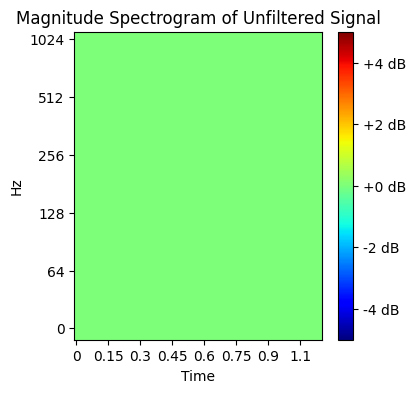

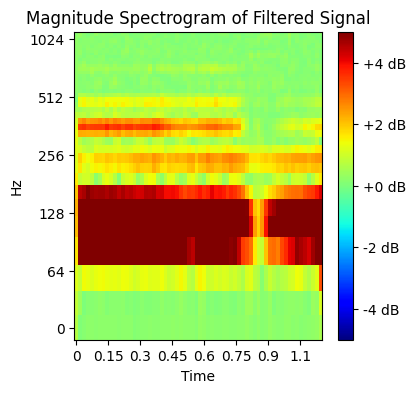

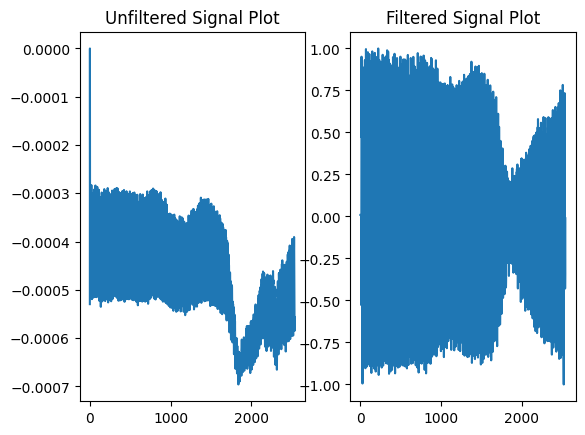

Converted and saved audio segment 1/16 to Documents.


/Users/omkarpatil/Documents/event_based_visual_microphone/steerable_pyramid/davis_method.py:67: ComplexWarning: Casting complex values to real discards the imaginary part
  bands[:, (b-1)] = band.flatten()


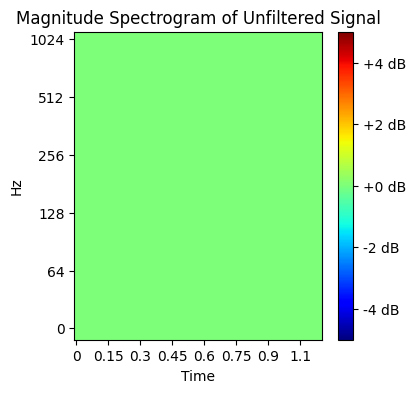

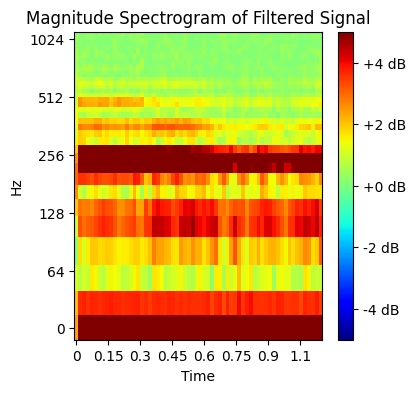

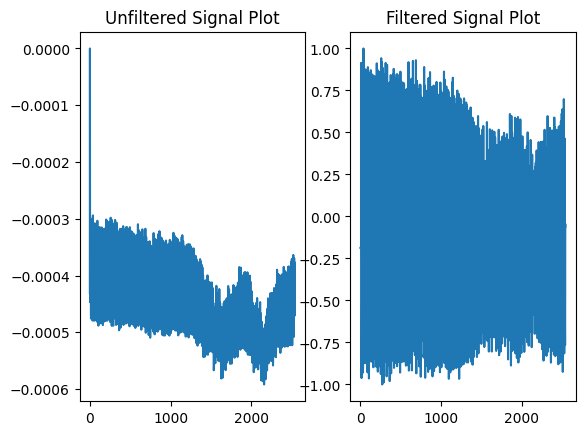

Converted and saved audio segment 2/16 to Documents.


KeyboardInterrupt: 

In [8]:
pyramid.ebvmSoundfromVideo(save_path, nscales, norientations, framerate)